# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

The new format for the SAT was released in March 2016. As an employee of the College Board - the organization that administers the SAT - you are a part of a team that tracks statewide participation and recommends where money is best spent to improve SAT participation rates.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
#Imports:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [4]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

### Answer: 

States are in alphabetical order for each. There are some differences between both sets of data such as: 

  - Headings:
   - The areas of testing are different for ACT and SAT. SAT tests for a combined Reading and Writing aptitude while in a similar subject area the ACT tests for Reading and English separately.
   - The ACT results include a National (average) in each area tested.
    
Data types may consist of strings, some of which will need conversion to numerical float for analysis.

#### 4a. Does the data look complete? 

### Answer: 

The data looks complete. It's a small enough list to visually check for missing or corrupted data as well as a number of python checks cleaning methods.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

#Answer:
#sat_min = str(sat_2017["Evidence-Based Reading and Writing"].min())
#print('Minimum value for Reading/Writing test is : '+ sat_min)

The ACT score range is 1-36, and that 36 is the perfect score. The ACT is scored out of a total of 36 points — this is known as the composite, or total, score. 
The lowest possible composite score is 1


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [5]:
#code

In [6]:
sat_2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [7]:
act_2017.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

#### 5. What are your data types? 
Display the data types of each feature. 

In [8]:
#code
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [9]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

- Pandas 'objects' are known as 'strings'. SAT columns with numbers are 'integers' while ACT columns with integers are 'float' type. 
- 'Composite' score column is set as a string object in ACT but should be either 'integer' or 'float'.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [10]:
#code

#def numeric_convert(x):
# Fix column Participation: remove '%' and change from str to float
def fix_data(x):
    return (float(x.replace("%", "")))*.01

sat_2017['Participation'] = sat_2017['Participation'].map(fix_data)

In [11]:
sat_2017.head() #Verify change to column 'Participation'

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [12]:
act_2017.head() #Before removing % and change to integer

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [13]:
act_2017['Participation'] = act_2017['Participation'].map(fix_data)

In [14]:
act_2017.head(20) #After % removal and change to integer

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8
6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8
7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2
8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2


- Fix any individual values preventing other columns from being the appropriate type.

In [15]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [16]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [17]:
#Change sat_2017 columns with integer datatype to float

sat_2017['Math'] = sat_2017['Math'].astype(float)
sat_2017['Total'] = sat_2017['Total'].astype(float)
sat_2017['Evidence-Based Reading and Writing']=sat_2017['Evidence-Based Reading and Writing'].astype(float)


sat_2017[['Math','Total','Evidence-Based Reading and Writing']].head()

,Math,Total,Evidence-Based Reading and Writing
0,572.0,1165.0,593.0
1,533.0,1080.0,547.0
2,553.0,1116.0,563.0
3,594.0,1208.0,614.0
4,524.0,1055.0,531.0


In [18]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object

In [19]:
#Finding duplicates
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [20]:
#act_2017['Composite'] = act_2017.Composite.apply(lambda x: isinstance(int, str))

- Finish your data modifications by making sure the columns are now typed appropriately.

In [21]:
print([act_2017['Composite']])

[0      21.0
1      19.2
2      19.8
3      19.7
4      19.4
5      22.8
6      20.8
7      25.2
8      24.1
9      24.2
10     19.8
11     21.4
12     19.0
13     22.3
14     21.4
15     22.6
16     21.9
17     21.7
18     20.0
19     19.5
20     24.3
21     23.6
22     25.4
23     24.1
24     21.5
25     18.6
26     20.4
27     20.3
28     21.4
29     17.8
30     25.5
31     23.9
32     19.7
33     24.2
34     19.1
35     20.3
36     22.0
37     19.4
38     21.8
39     23.7
40     24.0
41     18.7
42     21.8
43     19.8
44     20.7
45     20.3
46     23.6
47     23.8
48     21.9
49     20.4
50     20.5
51    20.2x
Name: Composite, dtype: object]


In [22]:
act_2017['Composite'][51] = act_2017['Composite'][51].replace('x','')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
act_2017['Composite'][51]

'20.2'

In [24]:
act_2017['Composite'] = act_2017['Composite'].astype(float)
act_2017['Composite'][51]

20.2

- Display the data types again to confirm they are correct.

In [25]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [26]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [27]:
act_2017 = act_2017.rename(columns={'Participation':'participation_act17',
                                    'English':'english_act17',
                                    'Math':'math_act17',
                                    'Reading': 'reading_act17',
                                    'Science':'science_act17',
                                    'Composite':'composite_act17'})

In [28]:
sat_2017 = sat_2017.rename(columns={'Participation' : 'participation_sat17' ,
                                    'Evidence-Based Reading and Writing' : 'EBRW_sat17',
                                    'Math' :'math_sat17',
                                    'Total':'total_sat17'})

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [29]:
#code
act_2017.count()

State                  52
participation_act17    52
english_act17          52
math_act17             52
reading_act17          52
science_act17          52
composite_act17        52
dtype: int64

In [30]:
sat_2017.count()

State                  51
participation_sat17    51
EBRW_sat17             51
math_sat17             51
total_sat17            51
dtype: int64

In [31]:
sat_2017.isnull().sum()

State                  0
participation_sat17    0
EBRW_sat17             0
math_sat17             0
total_sat17            0
dtype: int64

## `act_2017` has an extra row count of 52

In [32]:
act_2017.head()

,State,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [33]:
### The first row of act_2017 has 'National' which is not required for this dataset.

In [34]:
##national_avg
national_avg = act_2017.loc[0,:] #verifying and saving before deleting row
national_avg

State                  National
participation_act17         0.6
english_act17              20.3
math_act17                 20.7
reading_act17              21.4
science_act17                21
composite_act17              21
Name: 0, dtype: object

In [35]:
act_2017 = act_2017.drop([0], axis =0)

In [36]:
act_2017.count()

State                  51
participation_act17    51
english_act17          51
math_act17             51
reading_act17          51
science_act17          51
composite_act17        51
dtype: int64

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [37]:
#Code:

act_sat_17 = pd.merge(act_2017, sat_2017, on='State')
act_sat_17.head()

,State,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,EBRW_sat17,math_sat17,total_sat17
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593.0,572.0,1165.0
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547.0,533.0,1080.0
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563.0,553.0,1116.0
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614.0,594.0,1208.0
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531.0,524.0,1055.0


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [38]:
#code

act_sat_17.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [39]:
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')

In [40]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [41]:
sat_2017.head(9) #has duplicate Maine

,State,participation_sat17,EBRW_sat17,math_sat17,total_sat17
0,Alabama,0.05,593.0,572.0,1165.0
1,Alaska,0.38,547.0,533.0,1080.0
2,Arizona,0.30,563.0,553.0,1116.0
3,Arkansas,0.03,614.0,594.0,1208.0
4,California,0.53,531.0,524.0,1055.0
5,Colorado,0.11,606.0,595.0,1201.0
6,Connecticut,1.00,530.0,512.0,1041.0
7,Delaware,1.00,503.0,492.0,996.0
8,District of Columbia,1.00,482.0,468.0,950.0


In [42]:
act_2018 = act_2018.drop_duplicates(subset=None, keep='first', inplace=False)

In [43]:
type(sat_2018.iloc[8]['State'])

str

In [44]:
sat_2018.count()

State                                 51
Participation                         51
Evidence-Based Reading and Writing    51
Math                                  51
Total                                 51
dtype: int64

In [45]:
act_2018.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [46]:
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [47]:
### Instate function 'fix_data()' to column 'Participation' to remove "%" and change column type to integer

In [48]:
act_2018['Participation'] = act_2018['Participation'].map(fix_data)
act_2018.head()

,State,Participation,Composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


In [49]:
sat_2018['Participation'] = sat_2018['Participation'].map(fix_data)
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


### Change data type 'integer' to 'float'


In [50]:
sat_2018['Math'] = sat_2018['Math'].astype(float)
sat_2018['Total'] = sat_2018['Total'].astype(float)
sat_2018['Evidence-Based Reading and Writing']=sat_2018['Evidence-Based Reading and Writing'].astype(float)


sat_2018[['Math','Total','Evidence-Based Reading and Writing']].head()


,Math,Total,Evidence-Based Reading and Writing
0,571.0,1166.0,595.0
1,544.0,1106.0,562.0
2,572.0,1149.0,577.0
3,576.0,1169.0,592.0
4,536.0,1076.0,540.0


### Change all column headings to be unique

In [51]:
act_2018 = act_2018.rename(columns={'Participation':'participation_act18',
                                    'Composite':'composite_act18'})

sat_2018 = sat_2018.rename(columns={'Participation' : 'participation_sat18' ,
                                    'Evidence-Based Reading and Writing' : 'EBRW_sat18',
                                    'Math' :'math_sat18',
                                    'Total':'total_sat18'})

In [52]:
sat_2018.head(20)

,State,participation_sat18,EBRW_sat18,math_sat18,total_sat18
0,Alabama,0.06,595.0,571.0,1166.0
1,Alaska,0.43,562.0,544.0,1106.0
2,Arizona,0.29,577.0,572.0,1149.0
3,Arkansas,0.05,592.0,576.0,1169.0
4,California,0.60,540.0,536.0,1076.0
5,Colorado,1.00,519.0,506.0,1025.0
6,Connecticut,1.00,535.0,519.0,1053.0
7,Delaware,1.00,505.0,492.0,998.0
8,District of Columbia,0.92,497.0,480.0,977.0
9,Florida,0.56,550.0,549.0,1099.0


In [53]:
act_2018.head(2)

,State,participation_act18,composite_act18
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8


In [54]:
act_2018.count()

State                  51
participation_act18    51
composite_act18        51
dtype: int64

In [55]:
sat_2018.count()

State                  51
participation_sat18    51
EBRW_sat18             51
math_sat18             51
total_sat18            51
dtype: int64

In [56]:
act_sat_18 = pd.merge(act_2018, sat_2018, on='State')
sat_2018.dtypes

State                   object
participation_sat18    float64
EBRW_sat18             float64
math_sat18             float64
total_sat18            float64
dtype: object

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [57]:
act_sat_17_18 = pd.merge(act_sat_17, act_sat_18, on='State')
final = act_sat_17_18
final.head()

,State,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,EBRW_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,EBRW_sat18,math_sat18,total_sat18
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593.0,572.0,1165.0,1.00,19.1,0.06,595.0,571.0,1166.0
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547.0,533.0,1080.0,0.33,20.8,0.43,562.0,544.0,1106.0
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563.0,553.0,1116.0,0.66,19.2,0.29,577.0,572.0,1149.0
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614.0,594.0,1208.0,1.00,19.4,0.05,592.0,576.0,1169.0
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531.0,524.0,1055.0,0.27,22.7,0.60,540.0,536.0,1076.0


In [58]:
final = final.rename(columns={'State' : 'state'})

In [59]:
final.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [60]:
#Code:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
participation_act17,50.0,0.6592,0.321107,0.08,0.3100,0.71,1.000,1.0
english_act17,50.0,20.8620,2.324307,16.30,19.0000,20.55,23.100,25.5
math_act17,50.0,21.1360,1.973990,18.00,19.4000,20.90,23.000,25.3
reading_act17,50.0,21.9560,2.046317,18.10,20.4250,21.70,23.875,26.0
science_act17,50.0,20.9920,3.195139,2.30,19.9000,21.10,22.275,24.9
composite_act17,50.0,21.4660,2.004241,17.80,19.8000,21.40,23.400,25.5
participation_sat17,50.0,0.3860,0.345602,0.02,0.0400,0.34,0.650,1.0
EBRW_sat17,50.0,570.8600,44.385146,503.00,535.2500,559.50,613.500,644.0
math_sat17,50.0,549.2200,84.998269,52.00,523.2500,549.50,601.000,651.0
total_sat17,50.0,1129.6200,89.913085,996.00,1057.0000,1107.50,1214.000,1295.0


In [61]:
final.head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,EBRW_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,EBRW_sat18,math_sat18,total_sat18
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593.0,572.0,1165.0,1.00,19.1,0.06,595.0,571.0,1166.0
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547.0,533.0,1080.0,0.33,20.8,0.43,562.0,544.0,1106.0
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563.0,553.0,1116.0,0.66,19.2,0.29,577.0,572.0,1149.0
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614.0,594.0,1208.0,1.00,19.4,0.05,592.0,576.0,1169.0
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531.0,524.0,1055.0,0.27,22.7,0.60,540.0,536.0,1076.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [62]:
#code

#a function for standard deviation 
def stdev(n):
    m = sum(n)/len(n) #mean
    a = 1/len(n) 
    b = 0 #initialize
    for i in n:
        b += (i - m)**2
    return np.sqrt(a*b) #squareroot 

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [63]:
sdev = {key: round(stdev(value),4) for (key,value) in final.iloc[:,1:].items()}
sdev

{'participation_act17': 0.3179,
 'english_act17': 2.3009,
 'math_act17': 1.9542,
 'reading_act17': 2.0258,
 'science_act17': 3.163,
 'composite_act17': 1.9841,
 'participation_sat17': 0.3421,
 'EBRW_sat17': 43.9391,
 'math_sat17': 84.144,
 'total_sat17': 89.0094,
 'participation_act18': 0.3377,
 'composite_act18': 2.0901,
 'participation_sat18': 0.3672,
 'EBRW_sat18': 46.5379,
 'math_sat18': 46.5152,
 'total_sat18': 91.9125}

In [64]:
final['state']

0            Alabama
1             Alaska
2            Arizona
3           Arkansas
4         California
5           Colorado
6        Connecticut
7           Delaware
8            Florida
9            Georgia
10            Hawaii
11             Idaho
12          Illinois
13           Indiana
14              Iowa
15            Kansas
16          Kentucky
17         Louisiana
18             Maine
19          Maryland
20     Massachusetts
21          Michigan
22         Minnesota
23       Mississippi
24          Missouri
25           Montana
26          Nebraska
27            Nevada
28     New Hampshire
29        New Jersey
30        New Mexico
31          New York
32    North Carolina
33      North Dakota
34              Ohio
35          Oklahoma
36            Oregon
37      Pennsylvania
38      Rhode Island
39    South Carolina
40      South Dakota
41         Tennessee
42             Texas
43              Utah
44           Vermont
45          Virginia
46        Washington
47     West V

In [65]:
#Code:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
participation_act17,50.0,0.6592,0.321107,0.08,0.3100,0.71,1.000,1.0
english_act17,50.0,20.8620,2.324307,16.30,19.0000,20.55,23.100,25.5
math_act17,50.0,21.1360,1.973990,18.00,19.4000,20.90,23.000,25.3
reading_act17,50.0,21.9560,2.046317,18.10,20.4250,21.70,23.875,26.0
science_act17,50.0,20.9920,3.195139,2.30,19.9000,21.10,22.275,24.9
composite_act17,50.0,21.4660,2.004241,17.80,19.8000,21.40,23.400,25.5
participation_sat17,50.0,0.3860,0.345602,0.02,0.0400,0.34,0.650,1.0
EBRW_sat17,50.0,570.8600,44.385146,503.00,535.2500,559.50,613.500,644.0
math_sat17,50.0,549.2200,84.998269,52.00,523.2500,549.50,601.000,651.0
total_sat17,50.0,1129.6200,89.913085,996.00,1057.0000,1107.50,1214.000,1295.0


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [66]:
#Answer:

np.mean(final['english_act17'])

20.862

In [67]:
np.mean(final['total_sat17'])

1129.62

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?

# SAT Results for 2017 and 2018

## _HIGHEST Participation 2017 SAT:_ 
### Michigan 100%

In [68]:
#A preview to compare highest SAT/ACT scores for 2017

hi_sat_participation_2017 = final[['state','participation_sat17']].sort_values('participation_sat17',
                                                                               ascending=False).head()

In [69]:
hi_sat_participation_2017[:1][0:]

,state,participation_sat17
21,Michigan,1.0


In [70]:
print('Highest SAT Participation'+ hi_sat_participation_2017[:0])

Empty DataFrame
Columns: [state, participation_sat17]
Index: []


## _LOWEST Participation 2017 SAT:_ 
### North Dakota 2%

In [71]:
#A preview to compare lowest SAT/ACT scores for 2017

low_sat_participation_2017 = final[['state','participation_sat17']].sort_values('participation_sat17').head()
low_sat_participation_2017.head()

,state,participation_sat17
33,North Dakota,0.02
23,Mississippi,0.02
14,Iowa,0.02
24,Missouri,0.03
43,Utah,0.03


## _The state of North Dakota has the lowest participation rate for the SAT 2017 exam._

In [72]:
#A preview to compare highest SAT/ACT scores

hi_sat_participation_2018 = final[['state','participation_sat18']].sort_values('participation_sat18',
                                                                               ascending=False).head()

## _HIGHEST Participation 2018 SAT:_ 
### Colorado 100%

In [73]:
#A preview to compare highest SAT/ACT scores

hi_sat_participation_2018 = final[['state','participation_sat18']].sort_values('participation_sat18').head()

## _LOWEST Participation 2018 SAT:_ 
### North Dakota 2% (Again)

In [74]:
#A preview to compare highest SAT/ACT scores

low_sat_participation_2018 = final[['state','participation_sat18']].sort_values('participation_sat18').head()

# ACT Results for 2017 and 2018

In [75]:
#Compare highest SAT/ACT scores

final[['state', 
       'participation_act17']].sort_values('participation_act17',ascending=False).head()

,state,participation_act17
0,Alabama,1.0
16,Kentucky,1.0
48,Wisconsin,1.0
43,Utah,1.0
41,Tennessee,1.0


## _HIGHEST Participation 2017 ACT:_ 
### Alabama, Kentucky, Wisconsin ect... 100%

In [76]:
final[['state', 
       'participation_act17']].sort_values('participation_act17').head()

,state,participation_act17
18,Maine,0.08
7,Delaware,0.18
28,New Hampshire,0.18
38,Rhode Island,0.21
37,Pennsylvania,0.23


## _LOWEST Participation 2017 ACT:_ 
### Maine 8%

In [77]:
final[['state', 
       'participation_act18']].sort_values('participation_act18',ascending=False).head()

,state,participation_act18
0,Alabama,1.0
16,Kentucky,1.0
48,Wisconsin,1.0
43,Utah,1.0
41,Tennessee,1.0


## _HIGHEST Participation 2018 ACT:_ 
### Alabama, KY, Wisconsin ect...(17) 100%

In [78]:
final[['state', 
       'participation_act18']].sort_values('participation_act18').head()

,state,participation_act18
18,Maine,0.07
38,Rhode Island,0.15
28,New Hampshire,0.16
7,Delaware,0.17
37,Pennsylvania,0.20


## _LOWEST Participation 2018 ACT:_ 
### Maine 7%

In [79]:
# Scratchwork

In [80]:
min_sat17 = final.loc[:, 'participation_sat17'].min()
min_filter = (final['participation_sat17'] == min_sat17)
final.loc[min_filter, ['state', 'participation_sat17']]

,state,participation_sat17
14,Iowa,0.02
23,Mississippi,0.02
33,North Dakota,0.02


In [81]:
#min_sat17 = final.loc[:, 'participation_sat17'].min()
grt_filter = (final['participation_sat17'] >= .75)
final.loc[grt_filter, ['state', 'participation_sat17']].sort_values(by='participation_sat17')

,state,participation_sat17
20,Massachusetts,0.76
8,Florida,0.83
11,Idaho,0.93
18,Maine,0.95
28,New Hampshire,0.96
6,Connecticut,1.00
7,Delaware,1.00
21,Michigan,1.00


In [82]:
grt_filter = (final['total_sat18'] >= .75)
final.loc[grt_filter, ['state', 'total_sat18']].sort_values(by='total_sat18',ascending=False).head(10)

,state,total_sat18
22,Minnesota,1298.0
48,Wisconsin,1294.0
33,North Dakota,1283.0
14,Iowa,1265.0
15,Kansas,1265.0
24,Missouri,1262.0
49,Wyoming,1257.0
26,Nebraska,1252.0
16,Kentucky,1248.0
40,South Dakota,1240.0


In [83]:
final

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,EBRW_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,EBRW_sat18,math_sat18,total_sat18
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593.0,572.0,1165.0,1.00,19.1,0.06,595.0,571.0,1166.0
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547.0,533.0,1080.0,0.33,20.8,0.43,562.0,544.0,1106.0
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563.0,553.0,1116.0,0.66,19.2,0.29,577.0,572.0,1149.0
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614.0,594.0,1208.0,1.00,19.4,0.05,592.0,576.0,1169.0
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531.0,524.0,1055.0,0.27,22.7,0.60,540.0,536.0,1076.0
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606.0,595.0,1201.0,0.30,23.9,1.00,519.0,506.0,1025.0
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530.0,512.0,1041.0,0.26,25.6,1.00,535.0,519.0,1053.0
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503.0,492.0,996.0,0.17,23.8,1.00,505.0,492.0,998.0
8,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520.0,497.0,1017.0,0.66,19.9,0.56,550.0,549.0,1099.0
9,Georgia,0.55,21.0,20.9,22.0,21.3,21.4,0.61,535.0,515.0,1050.0,0.53,21.4,0.70,542.0,522.0,1064.0


## - Which states have the highest and lowest mean total/composite scores for the:
###    - 2018 SAT?
###    - 2017 ACT?
###    - 2018 ACT?

In [84]:
#2018 SAT highest mean total/composite

final[['state', 
       'total_sat17']].sort_values('total_sat17',ascending=False).head()

,state,total_sat17
22,Minnesota,1295.0
48,Wisconsin,1291.0
14,Iowa,1275.0
24,Missouri,1271.0
15,Kansas,1260.0


## _HIGHEST SAT Total Score 2017 :_ 
### Minnesota 1295.0

In [85]:
final[['state', 
       'total_sat18','participation_sat18']].sort_values('total_sat18')

,state,total_sat18,participation_sat18
7,Delaware,998.0,1.00
47,West Virginia,999.0,0.28
11,Idaho,1001.0,1.00
43,Utah,1010.0,0.04
10,Hawaii,1010.0,0.56
21,Michigan,1011.0,1.00
18,Maine,1013.0,0.99
38,Rhode Island,1018.0,0.97
12,Illinois,1019.0,0.99
5,Colorado,1025.0,1.00


## _LOWEST SAT Total Score 2017 :_ 
### Delaware 996.0

In [86]:
#2018 SAT highest mean total/composite

final[['state','total_sat17']].sort_values('total_sat17').head()

,state,total_sat17
7,Delaware,996.0
11,Idaho,1005.0
21,Michigan,1005.0
18,Maine,1012.0
8,Florida,1017.0


In [87]:
## HIGHEST ACT Composite Score 2017

In [88]:
final[['state', 
       'composite_act17']].sort_values('composite_act17',ascending=False).head()

,state,composite_act17
28,New Hampshire,25.5
20,Massachusetts,25.4
6,Connecticut,25.2
18,Maine,24.3
31,New York,24.2


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [89]:
final.head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,EBRW_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,EBRW_sat18,math_sat18,total_sat18
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593.0,572.0,1165.0,1.00,19.1,0.06,595.0,571.0,1166.0
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547.0,533.0,1080.0,0.33,20.8,0.43,562.0,544.0,1106.0
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563.0,553.0,1116.0,0.66,19.2,0.29,577.0,572.0,1149.0
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614.0,594.0,1208.0,1.00,19.4,0.05,592.0,576.0,1169.0
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531.0,524.0,1055.0,0.27,22.7,0.60,540.0,536.0,1076.0


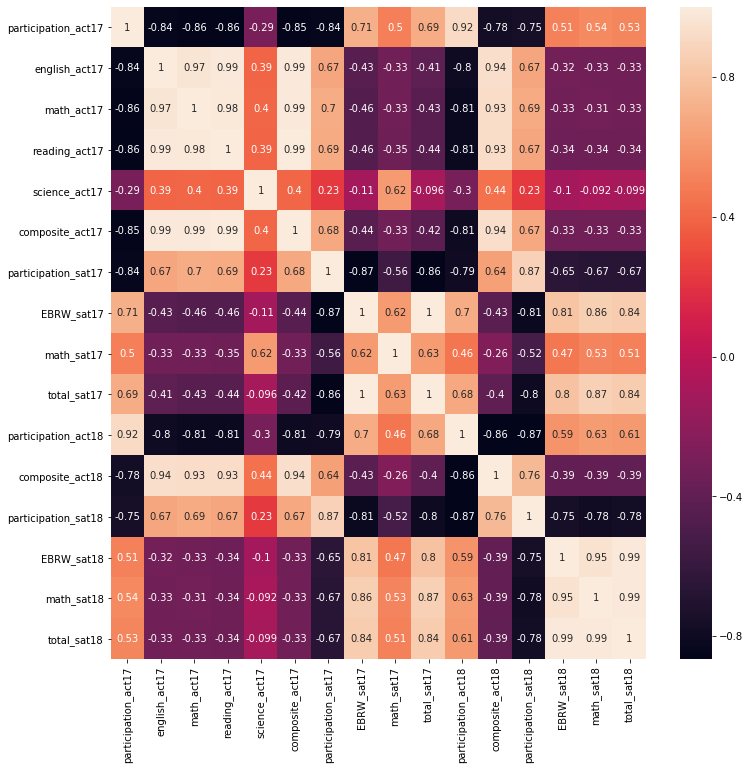

In [90]:
import seaborn as sns
# A:
plt.figure(figsize=(12,12))
sns.heatmap(final.corr(), annot=True);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [91]:
def subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [92]:
math_act = act_2017['math_act17']
math_sat = sat_2017['math_sat17']

Text(0.5, 1.0, 'Math ACT 2017 Scores  vs. Math SAT 2017 Scores ')

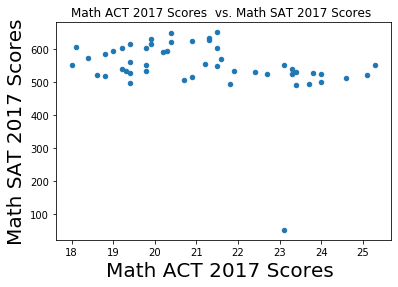

In [93]:
# Code
final.plot.scatter('math_act17', 'math_sat17') 
plt.xlabel('Math ACT 2017 Scores ', fontsize=20)
plt.ylabel('Math SAT 2017 Scores', fontsize=20)
plt.title('Math ACT 2017 Scores  vs. Math SAT 2017 Scores ')

As ACT Math (above) scores increase we see no increase in SAT Math scores whatsoever.

Text(0.5, 1.0, 'ACT Reading Scores  vs. SAT Verbal/Reading Scores ')

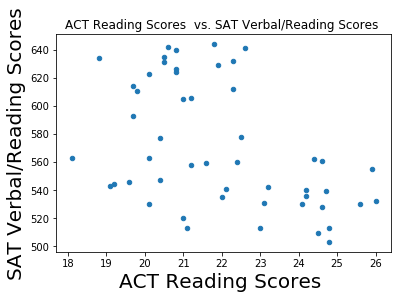

In [94]:
final.plot.scatter('reading_act17', 'EBRW_sat17') 
plt.xlabel('ACT Reading Scores ', fontsize=20)
plt.ylabel('SAT Verbal/Reading Scores', fontsize=20)
plt.title('ACT Reading Scores  vs. SAT Verbal/Reading Scores ')

We so little to none correlation between ACT Reading and SAT Verbal/Reading Scores

Text(0.5, 1.0, 'Composite ACT Scores  vs. Total SAT Scores 2017 ')

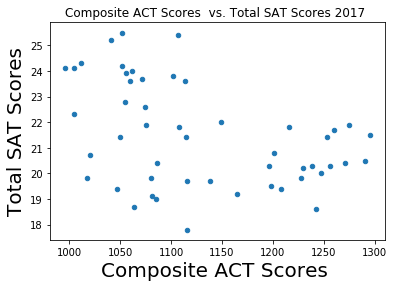

In [95]:
final.plot.scatter('total_sat17', 'composite_act17') 
plt.xlabel('Composite ACT Scores ', fontsize=20)
plt.ylabel('Total SAT Scores', fontsize=20)
plt.title('Composite ACT Scores  vs. Total SAT Scores 2017 ')

Also, little to none correlation between overall ACT and SAT scores.

Text(0.5, 1.0, 'SAT Scores 2017  vs. SAT Scores 2018 ')

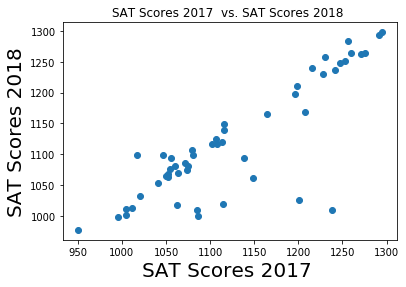

In [96]:
plt.scatter(sat_2017['total_sat17'], sat_2018['total_sat18']) 
plt.xlabel('SAT Scores 2017 ', fontsize=20)
plt.ylabel('SAT Scores 2018', fontsize=20)
plt.title('SAT Scores 2017  vs. SAT Scores 2018 ')

As the SAT scores in 2018 increased across the states we see and increase in 2018 SAT scores.

Text(0.5, 1.0, 'ACT Composite Scores,  2017 vs 2018 ')

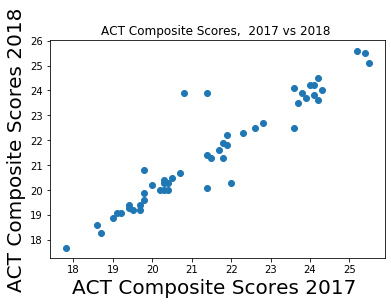

In [97]:
plt.scatter(act_2017['composite_act17'],act_2018['composite_act18']) 
plt.xlabel('ACT Composite Scores 2017 ', fontsize=20)
plt.ylabel('ACT Composite Scores 2018', fontsize=20)
plt.title('ACT Composite Scores,  2017 vs 2018 ')

A slightly stronger correlation between the ACT 2017 and 2018 overall scores.

In [98]:
final.head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,EBRW_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,EBRW_sat18,math_sat18,total_sat18
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593.0,572.0,1165.0,1.00,19.1,0.06,595.0,571.0,1166.0
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547.0,533.0,1080.0,0.33,20.8,0.43,562.0,544.0,1106.0
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563.0,553.0,1116.0,0.66,19.2,0.29,577.0,572.0,1149.0
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614.0,594.0,1208.0,1.00,19.4,0.05,592.0,576.0,1169.0
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531.0,524.0,1055.0,0.27,22.7,0.60,540.0,536.0,1076.0


Text(0.5, 1.0, 'Participation and Scores,  2017 vs 2018 ')

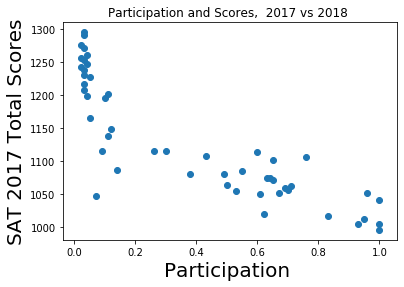

In [99]:
plt.scatter(final['participation_sat17'],final['total_sat17']) 
plt.xlabel('Participation ', fontsize=20)
plt.ylabel('SAT 2017 Total Scores', fontsize=20)
plt.title('Participation and Scores,  2017 vs 2018 ')

In [100]:
final.head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,EBRW_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,EBRW_sat18,math_sat18,total_sat18
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593.0,572.0,1165.0,1.00,19.1,0.06,595.0,571.0,1166.0
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547.0,533.0,1080.0,0.33,20.8,0.43,562.0,544.0,1106.0
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563.0,553.0,1116.0,0.66,19.2,0.29,577.0,572.0,1149.0
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614.0,594.0,1208.0,1.00,19.4,0.05,592.0,576.0,1169.0
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531.0,524.0,1055.0,0.27,22.7,0.60,540.0,536.0,1076.0


Text(0.5, 1.0, 'Participation and Composite Scores,  2017 ')

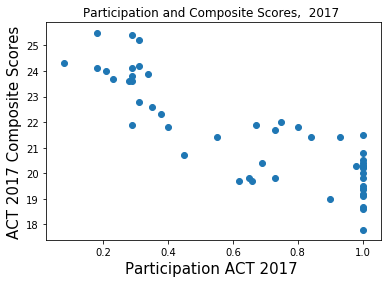

In [101]:
plt.scatter(final['participation_act17'],final['composite_act17']) 
plt.xlabel('Participation ACT 2017 ', fontsize=15)
plt.ylabel('ACT 2017 Composite Scores', fontsize=15)
plt.title('Participation and Composite Scores,  2017 ')

A slight negative correlation between Participation numbers and ACT 2017 overall scores. 
As the Participation increased the ACT Composite scores, how well students performed, decreased. 

In [102]:
participation_sat17 = final[['participation_sat17','total_sat17']]

In [103]:
participation_sat17.corr(method ='pearson')

,participation_sat17,total_sat17
participation_sat17,1.00000,-0.85853
total_sat17,-0.85853,1.00000


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [104]:
#final.columns.values
final.columns

Index(['state', 'participation_act17', 'english_act17', 'math_act17',
       'reading_act17', 'science_act17', 'composite_act17',
       'participation_sat17', 'EBRW_sat17', 'math_sat17', 'total_sat17',
       'participation_act18', 'composite_act18', 'participation_sat18',
       'EBRW_sat18', 'math_sat18', 'total_sat18'],
      dtype='object')

In [105]:
import matplotlib.pyplot as plt

In [106]:
def plt_subplots(df, columns, ncols):
    nrows = int(np.ceil((len(columns))/ncols))
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = (12, 2.5 * nrows))
    plt.style.use('bmh')
    plt.tight_layout(pad=3)
    ax = ax.ravel()
    for i, col in enumerate(columns):
        color = 'blue'
        alpha = 0.7
        ax[i].hist(final[col], color=color, alpha=alpha)
        ax[i].set_title(col)
        ax[i].set_ylabel('Frequency')
        ax[i].set_xlabel('')
        ax[i].axvline(df[col].mean(), color='red', linewidth=2)
        


In [107]:
final.head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,EBRW_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,EBRW_sat18,math_sat18,total_sat18
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593.0,572.0,1165.0,1.00,19.1,0.06,595.0,571.0,1166.0
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547.0,533.0,1080.0,0.33,20.8,0.43,562.0,544.0,1106.0
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563.0,553.0,1116.0,0.66,19.2,0.29,577.0,572.0,1149.0
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614.0,594.0,1208.0,1.00,19.4,0.05,592.0,576.0,1169.0
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531.0,524.0,1055.0,0.27,22.7,0.60,540.0,536.0,1076.0


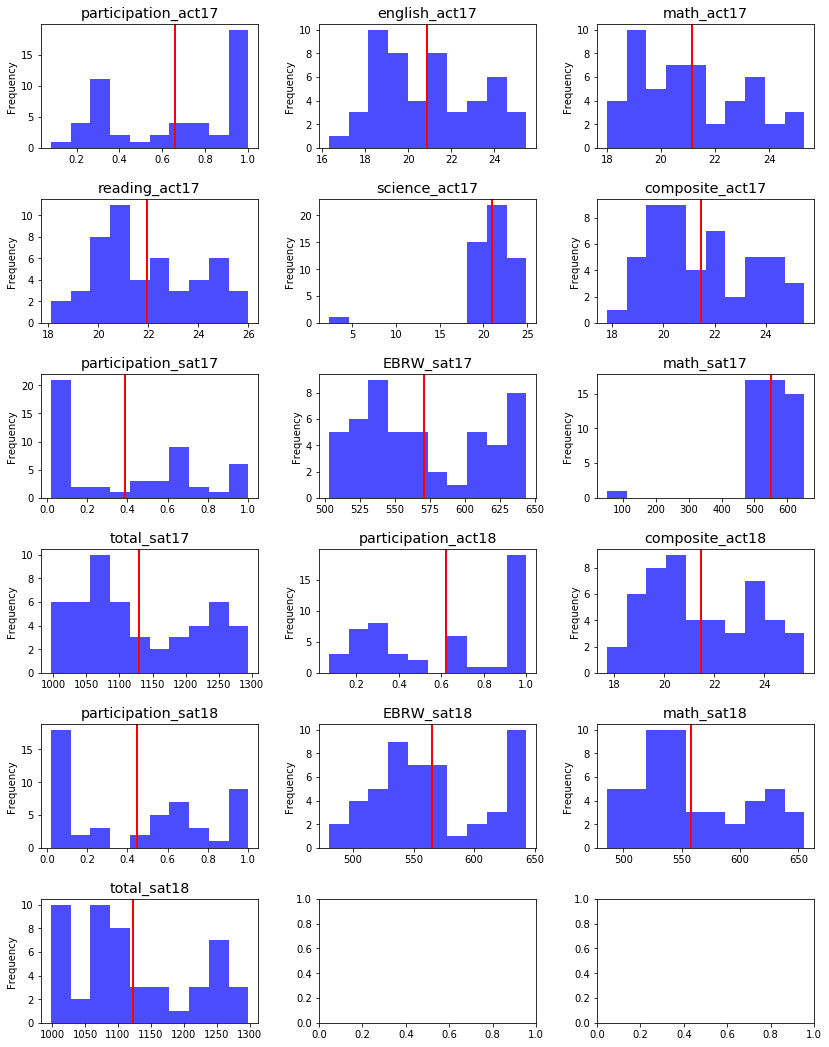

In [108]:
plt_subplots(final,final.columns[1:],3)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [109]:
type(final['total_sat18'])

pandas.core.series.Series

In [110]:
final.columns

Index(['state', 'participation_act17', 'english_act17', 'math_act17',
       'reading_act17', 'science_act17', 'composite_act17',
       'participation_sat17', 'EBRW_sat17', 'math_sat17', 'total_sat17',
       'participation_act18', 'composite_act18', 'participation_sat18',
       'EBRW_sat18', 'math_sat18', 'total_sat18'],
      dtype='object')

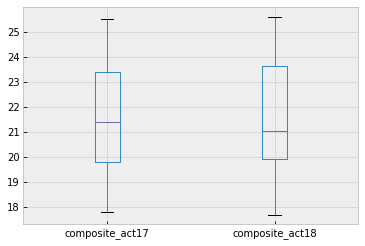

In [111]:
# Code
boxplot = final.boxplot(column=['composite_act17', 'composite_act18'])

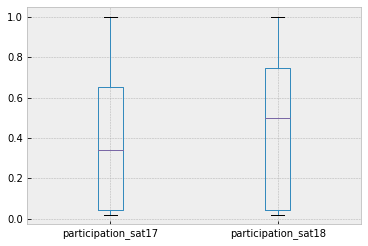

In [112]:
boxplot = final.boxplot(column=['participation_sat17', 'participation_sat18'])

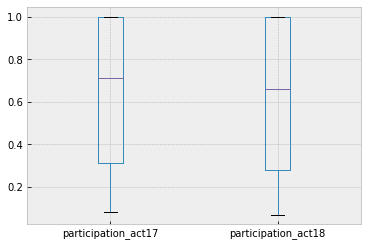

In [113]:
boxplot = final.boxplot(column=['participation_act17', 'participation_act18'])

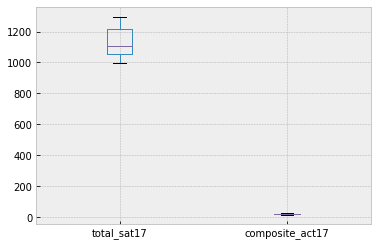

In [114]:
boxplot = final.boxplot(column=['total_sat17', 'composite_act17'])

In [115]:
final['sat_total_difference'] = final['total_sat18'] - final['total_sat17']

In [116]:
final.loc[:, ['state', 'total_sat17', 'total_sat18', 'sat_total_difference']].sort_values(by='sat_total_difference')

,state,total_sat17,total_sat18,sat_total_difference
43,Utah,1238.0,1010.0,-228.0
5,Colorado,1201.0,1025.0,-176.0
12,Illinois,1115.0,1019.0,-96.0
47,West Virginia,1086.0,999.0,-87.0
10,Hawaii,1085.0,1010.0,-75.0
34,Ohio,1149.0,1099.0,-50.0
30,New Mexico,1138.0,1093.0,-45.0
38,Rhode Island,1062.0,1018.0,-44.0
3,Arkansas,1208.0,1169.0,-39.0
14,Iowa,1275.0,1265.0,-10.0


In [117]:
final.columns

Index(['state', 'participation_act17', 'english_act17', 'math_act17',
       'reading_act17', 'science_act17', 'composite_act17',
       'participation_sat17', 'EBRW_sat17', 'math_sat17', 'total_sat17',
       'participation_act18', 'composite_act18', 'participation_sat18',
       'EBRW_sat18', 'math_sat18', 'total_sat18', 'sat_total_difference'],
      dtype='object')

In [118]:
final.loc[:, ['state',
              'participation_act17',
              'participation_act18',
              'sat_total_difference']].sort_values(by='sat_total_difference')

,state,participation_act17,participation_act18,sat_total_difference
43,Utah,1.00,1.00,-228.0
5,Colorado,1.00,0.30,-176.0
12,Illinois,0.93,0.43,-96.0
47,West Virginia,0.69,0.65,-87.0
10,Hawaii,0.90,0.89,-75.0
34,Ohio,0.75,1.00,-50.0
30,New Mexico,0.66,0.67,-45.0
38,Rhode Island,0.21,0.15,-44.0
3,Arkansas,1.00,1.00,-39.0
14,Iowa,0.67,0.68,-10.0


In [119]:
(final['composite_act18']-final['composite_act17']).max()

3.099999999999998

In [120]:
max_delta_sat = (final['total_sat18']-final['total_sat17']).max()

max_delta_sat

82.0

### Credit to Robbie for help with the below plot

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


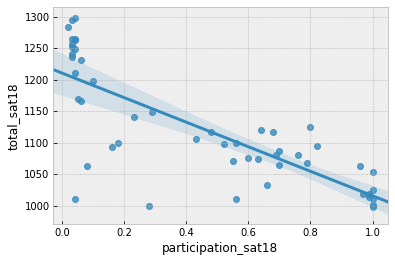

In [121]:
sns.regplot(final['participation_sat18'], final['total_sat18'])



#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

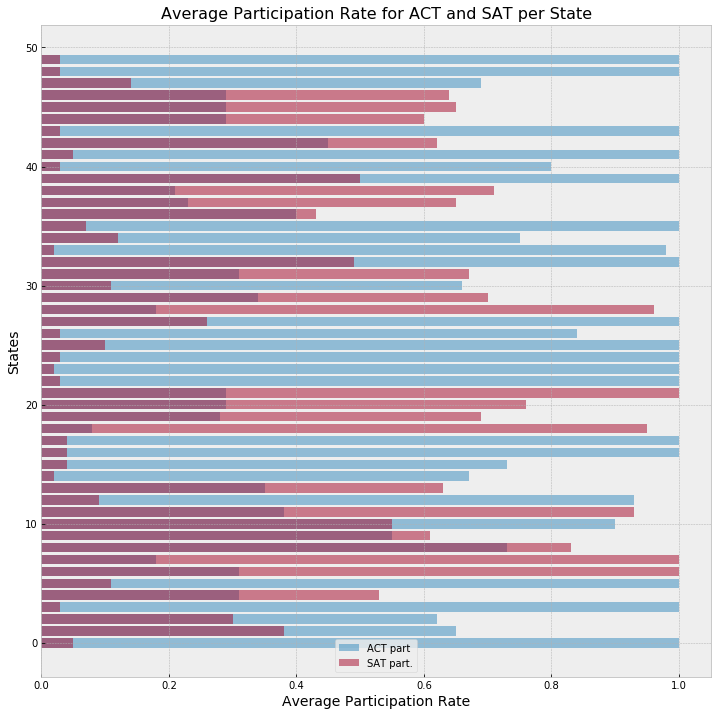

In [122]:
plt.subplots(figsize=(12,12)) # set a large canvas for plotting 
plt.barh(final.index,final.participation_act17, label='ACT part', alpha=0.5) # make a bar graph 
plt.barh(final.index, final.participation_sat17, label='SAT part.', alpha=0.5) 
#plt.axvline(65, label="ACT mean", color='k') # make a vertical line 
#plt.axvline(40, label="SAT mean", color='red') # make a vertical line 
plt.legend(loc='lower center') 
plt.title("Average Participation Rate for ACT and SAT per State", fontsize=16) 
plt.xlabel("Average Participation Rate", fontsize=14) 
plt.ylabel('States',fontsize=14) 
plt.show()

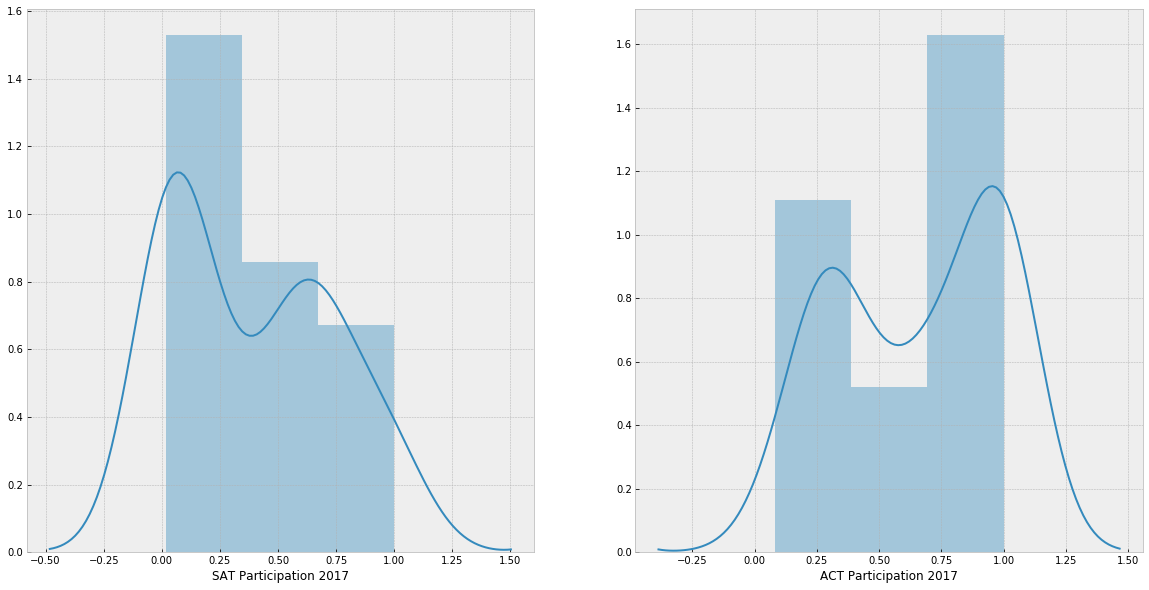

In [123]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,10) )
sns.distplot(final['participation_sat17'], axlabel='SAT Participation 2017', ax=ax1)
#plt.axvline(.448, label="SAT mean", color='red')

sns.distplot(final['participation_act17'], axlabel='ACT Participation 2017', ax=ax2);
#plt.axvline(.659, label="ACT mean", color='red') # make a vertical line ;;# make a vertical line ;

In [124]:
final['participation_sat17'].mean()   #Left skewed 

0.386

In [125]:
final['participation_act17'].mean()   #Right skewed

0.6591999999999999

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Massachussets would be a state that may be out of the norm with both a high SAT (1125) score as well as a a relatively high participation for 2018 - 0.8 (80%).

https://magoosh.com/hs/sat/sat-scores/2018/average-sat-scores-by-state-how-does-your-state-stack-up/

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

The four top SAT states; Minnesota, Wisconsin, North Dakota, and Iowa, do not require the SAT for graduation. They are also low participation states. We'll review their stats Yet, Massachusettes state has a relatively high participation rate (0.80) and 19th in top SAT scoring.

## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code: